In [1]:
import pandas as pd

def cal_flow(x):
    in_degree = x['in_num']
    out_degree = x['out_num']
    return (in_degree - out_degree) / (in_degree + out_degree)


def get_all_lib_flow(language):
    df = pd.read_csv(f'migration/{language}_migration_group.csv')
    df_in = df['add_lib'].value_counts().reset_index()
    df_out = df['rem_lib'].value_counts().reset_index()
    df_in.columns = ['lib', 'in_num']
    df_out.columns = ['lib', 'out_num']
    df_inout = df_in.merge(df_out, on='lib', how='outer')
    df_inout = df_inout.fillna(0)
    df_inout['flow'] = df_inout.apply(cal_flow, axis=1)
    df_inout.to_csv(f'temp/{language}_flow.csv')
    return df_inout

In [2]:
get_all_lib_flow('python')
get_all_lib_flow('java')
get_all_lib_flow('js')
print()

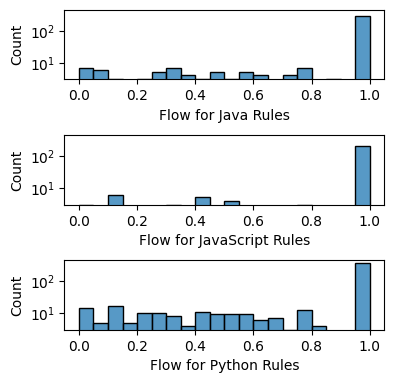

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


language = ['java', 'js', 'python']
language_name = {
    'python': 'Python',
    'java': 'Java',
    'js': 'JavaScript'
}

def get_reason_flow_lib(language, reason):
    reason_df = pd.read_csv(f'reason/{language}_reason.csv')
    df = pd.read_csv(f'temp/{language}_flow.csv')
    libs = set()
    for p in reason_df[reason_df['group_reason']==reason]['pattern']:
        add_lib, rem_lib = p.split(' ')
        libs.add(rem_lib)

    dir = []
    for lib in libs:
        l_df = df[df['lib']==lib]
        if len(l_df) != 0:
            dir.append(l_df['flow'].values[0])
    return dir


fig, axes = plt.subplots(3, 1, figsize=(4, 4))
for i, ymax in [(0, 300), (1, 400), (2, 400)]:
    data = pd.read_csv(f'temp/{language[i]}_flow.csv')['flow'].values
    sns.histplot(np.abs(data), binwidth=1/20, ax=axes[i], log_scale=[False, True])

    axes[i].set_xlim(-0.05, 1.05)
    axes[i].set_ylabel(f'Count')
    axes[i].minorticks_off()
    axes[i].set_ylim(3, 450)
    axes[i].set_xlabel(f"Flow for {language_name[language[i]]} Rules")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0, 
                    hspace=0.8)
plt.savefig("pic/flow.pdf", bbox_inches="tight")
plt.show()

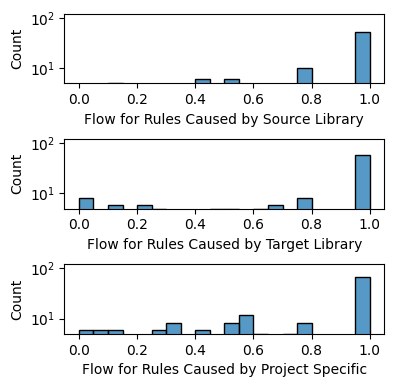

In [4]:
reasons = ['source library', 'target library', 'project specific']
reason_title = ['Source Library', 'Target Library', 'Project Specific']
languages = ['java', 'js', 'python']

fig, axes = plt.subplots(3, 1, figsize=(4, 4))
for i in range(0, 3):
    data = []
    for k in range(0, 3):
        data.extend(get_reason_flow_lib(languages[k], reasons[i]))

    sns.histplot(np.abs(data), binwidth=1/20, ax=axes[i], log_scale=[False, True])
    axes[i].set_xlim(-0.05, 1.05)
    axes[i].set_ylabel(f'Count')
    axes[i].minorticks_off()
    axes[i].set_ylim(5, 120)
    axes[i].set_xlabel(f"Flow for Rules Caused by {reason_title[i]}")

plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0, 
                hspace=0.8)
plt.savefig(f"pic/flow_reason.pdf", bbox_inches="tight")
plt.show()